In [ ]:
#Generalized Least Squares and Autocorrelation

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('SalesData.csv') #Switch to "SalesData.csv" for autocorrelation example
df.head()
#df.dtypes

,MonthYear,TotalSales,AverageTemperature,TotalPrecip,LocalUE,Recession,Confidence,TERMCBAUTO48NS,UsedCPI,SandP500,...,GAPageviews,Leads,BOBBDC,NewInventory,UsedInventory,TotalInventory,q2,q3,q4,Unnamed: 24
0,12-Aug,121,78,127,7.6,0,74.3,4.880000,150.871,1403.448258,...,"8,407",358,0,66,83,149,0,1,0,NaN
1,12-Sep,78,68,204,7.0,0,78.3,4.860000,149.647,1443.419472,...,"24,116",271,0,91,74,165,0,1,0,NaN
2,12-Oct,93,57,151,6.9,0,82.6,4.840000,148.986,1437.816662,...,"24,473",312,0,84,70,154,0,0,1,NaN
3,12-Nov,92,46,92,6.9,0,82.7,4.820000,148.932,1394.512387,...,"22,900",275,0,54,82,136,0,0,1,NaN
4,12-Dec,99,42,108,7.1,0,72.9,4.776667,149.243,1422.285492,...,"23,321",255,0,43,117,160,0,0,1,NaN


In [10]:
xvars = ['AverageTemperature', 'TotalPrecip', 'LocalUE', 'Recession', 'TERMCBAUTO48NS', 'UsedCPI', 'BOBBDC', 'TotalInventory', 'q2', 'q3', 'q4']
X = df[xvars]
y = df['TotalSales']

In [12]:
OLS_model = sm.OLS(y, X) 
OLS_results = OLS_model.fit()
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              576.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                    1.65e-99
Time:                        15:15:33   Log-Likelihood:                         -573.81
No. Observations:                 133   AIC:                                      1170.
Df Residuals:                     122   BIC:                                      1201.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.6522      0.220      2.970      0.004       0.217       1.087
TotalPrecip            0.0313      0.021      1.485      0.140      -0.010       0.073
LocalUE                1.3214      0.880      1.501      0.136      -0.421       3.064
Recession            -40.6913     14.535     -2.800      0.006     -69.464     -11.919
TERMCBAUTO48NS        14.2177      2.410      5.899      0.000       9.447      18.989
UsedCPI               -0.2058      0.075     -2.729      0.007      -0.355      -0.056
BOBBDC                40.3264      3.987     10.115      0.000      32.434      48.219
TotalInventory         0.2184      0.060      3.656      0.000       0.100       0.337
q2                    -9.8264      7.747     -1.268      0.207     -25.162       5.510
q3                   -15.9552      9.265     -1.722      0.088     -34.296       2.385
q4                   -11.4077      5.222     -2.185      0.031     -21.745      -1.071
==============================================================================
Omnibus:                        7.610   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.609
Skew:                           0.125   Prob(JB):                        0.165
Kurtosis:                       2.233   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Durbin-Watson Statistic 
dw_statistic = sm.stats.durbin_watson(OLS_results.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.4714446509099735


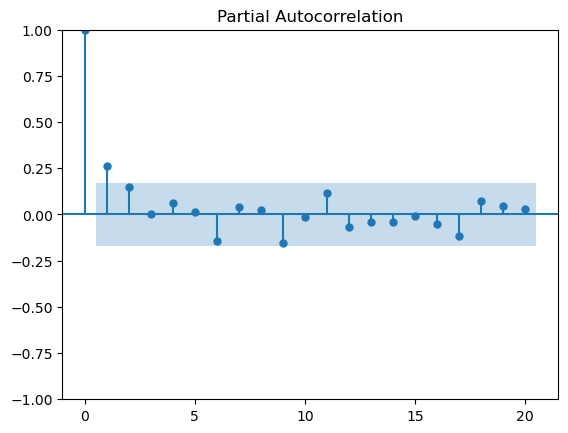

In [16]:
#PACF plot
sm.graphics.tsa.plot_pacf(OLS_results.resid, lags=20)
plt.show()

In [18]:
GLS_model = sm.GLSAR(y, X, rho=1)  #rho is the order of autoregression, per the PACF above
GLS_results = GLS_model.iterative_fit()
GLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                GLSAR Regression Results                               
=======================================================================================
Dep. Variable:             TotalSales   R-squared (uncentered):                   0.964
Model:                          GLSAR   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              296.7
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                    6.12e-82
Time:                        15:15:58   Log-Likelihood:                         -564.25
No. Observations:                 132   AIC:                                      1151.
Df Residuals:                     121   BIC:                                      1182.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AverageTemperature     0.8346      0.214      3.897      0.000       0.411       1.259
TotalPrecip            0.0183      0.020      0.930      0.354      -0.021       0.057
LocalUE                1.7412      1.096      1.588      0.115      -0.429       3.912
Recession            -44.8462     15.162     -2.958      0.004     -74.864     -14.829
TERMCBAUTO48NS        15.2920      3.056      5.005      0.000       9.243      21.341
UsedCPI               -0.2173      0.099     -2.196      0.030      -0.413      -0.021
BOBBDC                41.3816      4.994      8.287      0.000      31.495      51.268
TotalInventory         0.1529      0.058      2.617      0.010       0.037       0.269
q2                   -14.9661      7.169     -2.088      0.039     -29.158      -0.774
q3                   -22.9786      8.420     -2.729      0.007     -39.649      -6.308
q4                   -14.6136      5.466     -2.674      0.009     -25.435      -3.792
==============================================================================
Omnibus:                        4.055   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                2.785
Skew:                           0.187   Prob(JB):                        0.248
Kurtosis:                       2.395   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
OLS_params = OLS_results.params
GLS_params = GLS_results.params
param_frame = pd.DataFrame({"OLS": OLS_params, "GLS": GLS_params})
param_frame

,OLS,GLS
AverageTemperature,0.652230,0.834610
TotalPrecip,0.031320,0.018270
LocalUE,1.321446,1.741221
Recession,-40.691324,-44.846233
TERMCBAUTO48NS,14.217709,15.292016
UsedCPI,-0.205769,-0.217255
BOBBDC,40.326436,41.381614
TotalInventory,0.218415,0.152929
q2,-9.826400,-14.966099
q3,-15.955198,-22.978577
